## COMP9517 La1

Tool functions and imports

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [37]:
def plot_images(titiles, images, row, col):
    figure = plt.figure()
    for i in range(len(titiles)):
        pic = figure.add_subplot(row, col, i + 1)
        pic.imshow(images[i], cmap='gray', vmin=0, vmax=255)
        # pic.imshow(images[i], cmap='gray')
        pic.set_title(titiles[i])
        pic.set_axis_off()

### Question 1: contrast Stretching

In [38]:
img = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)

In [39]:
# compute new image(performed contrast stretching)
a = 0
b = 255
# got the min and max pixel values
c = np.min(img)
d = np.max(img)
q1_image = (img - c) * ((b - a)/ (d - c)) + a

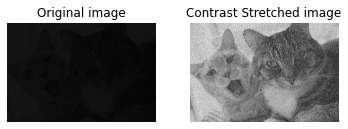

In [40]:
titiles = ['Original image', 'Contrast Stretched image']
images = [img, q1_image]
plot_images(titiles,images, 2, 2)

### Question 2: Histogram

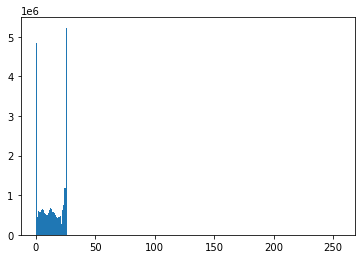

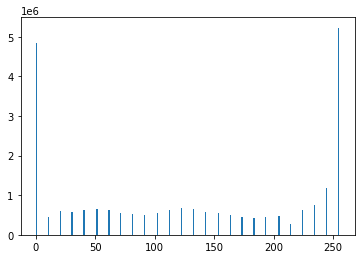

In [41]:
def compute_histogram(q2_image):
    figure = plt.figure()
    
    q2_image_flatten = q2_image.ravel()
    plt.hist(q2_image_flatten, 256, [0, 256])

compute_histogram(img)
compute_histogram(q1_image)

Thr first samples are the closest match

### Question 3: smoothing filters


In [42]:
# Using opencv functions
# mean Filter
image_mean = cv2.blur(q1_image, (3, 3))
# medium Filter
q1_image = q1_image.astype(np.uint8)
image_medium = cv2.medianBlur(q1_image, 3)
# Gaussian Filter
image_gaussian = cv2.GaussianBlur(q1_image, (3, 3), 1.5)

figure = plt.figure()

titiles = ['Original pic', 'mean filter 3*3', 'medium filter 3*3', 'gaussian filter 3*3 1.5']
images = [new_image, image_mean, image_medium, image_gaussian]

for i in range(4):
    pic = figure.add_subplot(2, 3, i + 1)
    pic.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    pic.set_title(titiles[i])
    pic.set_axis_off()


NameError: name 'new_image' is not defined

### Question 4 Images Edge

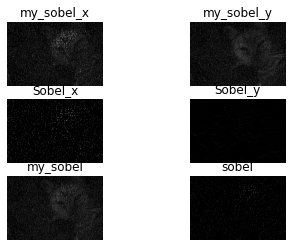

In [67]:
# Without using sobel build-in functions
# 1. define 2D filter
F_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
F_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  
# 2. perform convolution between the image and F_x to obtain the gradients at x direction
gradients_x = cv2.filter2D(image_medium, ddepth= -1, F_x)
# gradients_x = cv2.convertScaleAbs(gradients_x)
# 3. similarly perform at y
gradients_y = cv2.filter2D(image_medium, ddepth= -1, F_y)
# gradients_y = cv2.convertScaleAbs(gradients_y)
my_sobel = cv2.addWeighted(gradients_x, 0.5, gradients_y, 0.5, 0)
cv2.imwrite('my_sobel_x.png', gradients_x)
cv2.imwrite('my_sobel_y.png', gradients_y)
cv2.imwrite('my_sobel.png', my_sobel)

# using sobel build-in fuctions
sobel_x = cv2.Sobel(image_medium, cv2.CV_64F, 1, 0, ksize = 3)
# sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.Sobel(image_medium, cv2.CV_64F, 0, 1, ksize = 3)
# sobel_y = cv2.convertScaleAbs(sobel_y)
sobel = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
cv2.imwrite('sobel_x.png', sobel_x)
cv2.imwrite('sobel_y.png', sobel_y)
cv2.imwrite('sobel.png', sobel)

# plot the images
titiles = ['my_sobel_x', 'my_sobel_y', 'Sobel_x', 'Sobel_y', 'my_sobel', 'sobel']
images = [gradients_x, gradients_y, sobel_x, sobel_y, my_sobel, sobel]
plot_images(titiles, images, 3, 2)


In [ ]:
# shutdown opencv
cv2.destroyAllWindows()